In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
dataset_path = '/content/drive/MyDrive/Image Scene Classification'

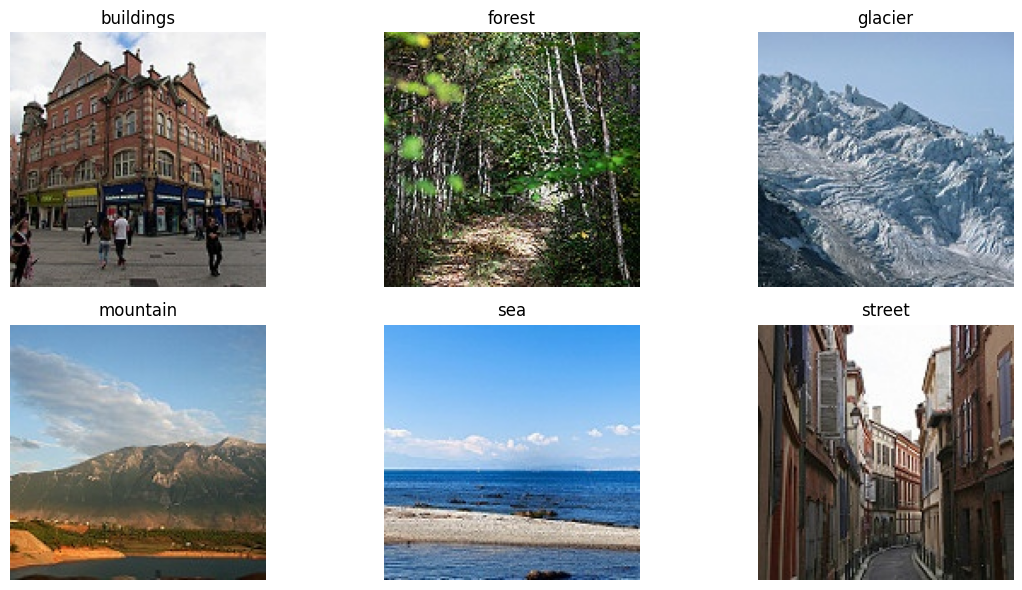

Found 96 images belonging to 6 classes.
Found 24 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2031 - loss: 3.5240

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2070 - loss: 3.7416 - val_accuracy: 0.2083 - val_loss: 3.6911
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2786 - loss: 3.1038 - val_accuracy: 0.4167 - val_loss: 1.7887
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4805 - loss: 1.4540 - val_accuracy: 0.5417 - val_loss: 1.4611
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6667 - loss: 1.2322 - val_accuracy: 0.5000 - val_loss: 1.3725
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5885 - loss: 1.0969 - val_accuracy: 0.6250 - val_loss: 1.2679
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8333 - loss: 0.8735 - val_accuracy: 0.5833 - val_loss: 1.1289
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9089 - loss: 0.5200 - val_accuracy: 0.6250 - val_loss: 1.0345
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9466 - loss: 0.3200 - val_accuracy: 0.5417 - val_loss: 1.2284
Epoch 9/10
3/3 ━━━━━━━━━━━

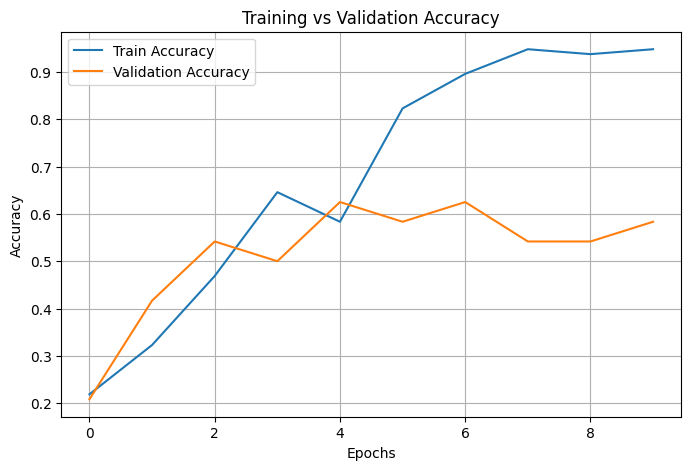

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - accuracy: 0.5833 - loss: 1.4414
 Final Validation Accuracy: 0.5833


In [26]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Show one image from each of the 6 subfolders
class_names = sorted(os.listdir(dataset_path))

plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)
    image_name = os.listdir(class_folder)[0]  # Pick first image
    image_path = os.path.join(class_folder, image_name)

    img = Image.open(image_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Prepare data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Final evaluation
val_loss, val_acc = model.evaluate(val_data)
print(f" Final Validation Accuracy: {val_acc:.4f}")
